In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-05-20 to 2019-07-05 - 121


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

117


,len,mean,std,shrp,drawdown
Symbols,,,,,
MTUM,28,1.099296,2.141910,0.494705,2.638699
USMV,28,0.837269,1.712148,0.465840,1.936934
PDP,28,1.112014,2.354589,0.455422,3.212556
VIG,28,0.915569,1.955770,0.447847,2.979065
IWP,28,1.047897,2.268060,0.444527,3.813804
NOBL,28,0.911373,1.999040,0.436055,3.439586
JHMM,28,0.920447,2.037957,0.432180,3.879671
LRGF,28,0.933600,2.105626,0.424538,4.353457
FTCS,28,0.888669,2.008954,0.422601,3.386125


evicted USA 0.896052201810552
retry backlogs ['SLYV', 'EZM', 'IJS', 'FPX', 'IJT', 'LRGF', 'ONEQ', 'OEF', 'SLY', 'DSI', 'SCHV', 'VXF', 'HDV', 'DGRW', 'DGRO', 'QDF', 'MTUM', 'FDL', 'SUSA', 'XSLV', 'DVY', 'VIG', 'IUSG', 'SPLG', 'MOAT', 'IVW', 'FVD', 'MDYG', 'QUAL', 'VIOO', 'SLYG', 'SCHA', 'GSLC', 'JHMM', 'VTWO', 'VOE', 'SPYG', 'FEX', 'VO', 'RSP', 'SPHQ', 'SCHB', 'VLUE', 'SPYD', 'VBR', 'QQQ', 'VV', 'SCHG', 'VOO', 'IJH', 'SCHM', 'VB', 'IWP', 'ITOT', 'IYY', 'IWR', 'VTV', 'VONV', 'VONG', 'JKE', 'MGC', 'IWM', 'SPMD', 'MDY', 'IWY', 'IJK', 'PDP', 'VOT', 'SDY', 'DLN', 'DON', 'VYM', 'SPLV', 'IUSV', 'VUG', 'RPG', 'VONE', 'VOOG', 'FTCS', 'IWB', 'IVV', 'MGV', 'SPY', 'IVE', 'SPTM', 'IWV', 'IWS', 'SCHX', 'SPYV', 'MGK', 'IJJ', 'DIA', 'IWD', 'PRF', 'VTI', 'XMLV', 'FNDA', 'MDYV', 'FTA', 'SPSM', 'IWF', 'SCHD', 'PKW', 'ADX', 'PWV', 'IJR', 'FV', 'RDIV', 'IWO', 'SDOG', 'TILT', 'FNDX', 'RVT', 'NOBL'] at 0.905 - 0.468
evicted SPLV 0.8906033325695795
evicted VLUE 0.8802090806740372
evicted QQQ 0.8656047586962468

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
MTUM,28.0,1.099296,2.14191,-2.116999,-0.590523,1.15982,2.388106,6.048635,0.494705,2.638699
Portfolio,28.0,1.099296,2.14191,-2.116999,-0.590523,1.15982,2.388106,6.048635,0.494705,2.638699


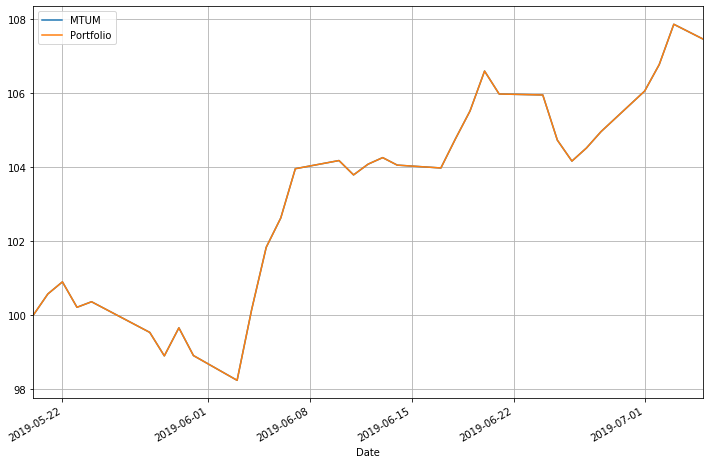

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

In [4]:
Quote(screen_funds('Equities', 'Domestic', 'Preferred'), 50, 5).statistics()

,len,mean,std,shrp,drawdown
Symbols,,,,,
FPE,28,0.378069,0.358882,0.942888,0.313142
VRP,28,0.285235,0.353927,0.693794,0.565205
PGX,28,0.242375,0.304118,0.666495,0.502395
PFF,28,0.304326,0.451583,0.586034,0.754922
PGF,28,0.226627,0.471376,0.396594,0.876261
